C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


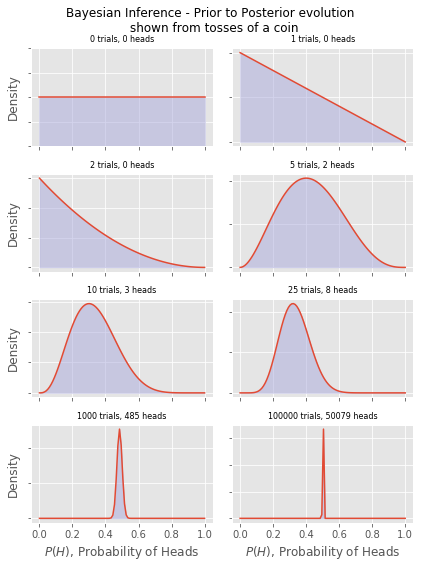

In [18]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as fig
%matplotlib inline
#https://www.quantstart.com/articles/Bayesian-Statistics-A-Beginners-Guide
# Create a list of the number of coin tosses ("Bernoulli trials")
number_of_trials = [0, 1, 2, 5, 10, 25, 1000,100000]# 100, 500, 1000, 10000, 20000]

# Conduct 500 coin tosses and output into a list of 0s and 1s
# where 0 represents a tail and 1 represents a head
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])

# Discretise the x-axis into 100 separate plotting points
x = np.linspace(0, 1, 100)

# Loops over the number_of_trials list to continually add
# more coin toss data. For each new set of data, we update
# our (current) prior belief to be a new posterior. This is
# carried out using what is known as the Beta-Binomial model.
# For the time being, we won't worry about this too much. It 
# will be the subject of a later article!

#fig,axes = fig.subplots(figsize=(5,8),4,2)
fig = plt.figure(figsize=(6,8))
for i, N in enumerate(number_of_trials):
    # Accumulate the total number of heads for this 
    # particular Bayesian update
    heads = data[:N].sum()

    # Create an axes subplot for each update 
    ax = fig.add_subplot(len(number_of_trials) / 2, 2, i + 1)
    ax.set_title("%s trials, %s heads" % (N, heads),fontsize=8)

    # Add labels to both axes and hide labels on y-axis
    if i > len(number_of_trials) -3:
        ax.set_xlabel("$P(H)$, Probability of Heads")
    else:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    if i % 2 != 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel("Density")
    if i == 0:
        ax.set_ylim([0.0, 2.0])
    ax.set_yticklabels('')#, visible=False)

    # Create and plot a  Beta distribution to represent the 
    # posterior belief in fairness of the coin.
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    ax.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    ax.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)

# Expand plot to cover full width/height and show it
fig.tight_layout(rect=[0,0,1,.95])
fig.suptitle('Bayesian Inference - Prior to Posterior evolution \n shown from tosses of a coin')
fig.show()
fig.savefig(r'c:\temp\BayesianInference.png',dpi=600)

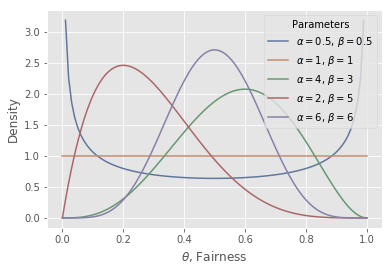

In [19]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns


#if __name__ == "__main__":
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
x = np.linspace(0, 1, 100)
params = [
    (0.5, 0.5),
    (1, 1),
    (4, 3),
    (2, 5),
    (6, 6)
]
for p in params:
    y = beta.pdf(x, p[0], p[1])
    plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % p)
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.legend(title="Parameters")
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats
%matplotlib inline
plt.style.use("ggplot")

logp = -1.1786, ||grad|| = 5.2703: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 42000/42000 [00:28<00:00, 1488.17draws/s]
The number of effective samples is smaller than 25% for some parameters.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


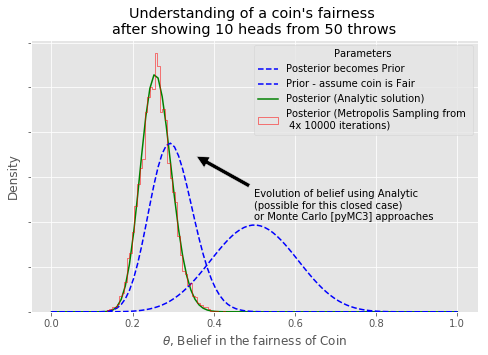

In [31]:
# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 22 #  12
beta = 52 #  12
alpha_post = 35 #[35,35,35]
beta_post= 100 #[110,120,100]
clr = ['g','b','r']
#lst = zip(alpha_posts,beta_posts,clr)
# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 10000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

# Plot the posterior histogram from MCMC analysis
bins=50

fig,ax = plt.subplots(figsize=(8,5))

ax.hist(
    trace["theta"], bins, 
    histtype="step", density=True, 
    label="Posterior (Metropolis Sampling from \n 4x %s iterations)"%iterations, color="red",zorder=10
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
ax.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Posterior becomes Prior", color="blue"
)

ax.plot(
    x, stats.beta.pdf(x, 12, 12), 
    "--", label="Prior - assume coin is Fair", color="blue"
)
#for alpha_post,beta_post,col in lst:
ax.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic solution) ', color="green",zorder=1
)

# Update the graph labels
ax.legend(title="Parameters", loc="best")
ax.set_xlabel("$\\theta$, Belief in the fairness of Coin")
ax.set_ylabel("Density")
ax.set_yticklabels([])
ax.set_title('Understanding of a coin\'s fairness \nafter showing 10 heads from 50 throws')
ax.annotate('Evolution of belief using Analytic \n(possible for this closed case) \nor Monte Carlo [pyMC3] approaches', xy=(0.35, 7), xytext=(0.5, 4.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

fig.show()
fig.savefig(r'C:\temp\PyMC3_%sB.png'%iterations,dpi=600)

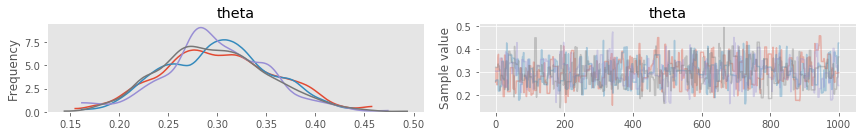

In [14]:
'''
When the code is executed the following output is given:
Applied logodds-transform to theta and added transformed theta_logodds to model.
[-----            14%                  ] 14288 of 100000 complete in 0.5 sec
[----------       28%                  ] 28857 of 100000 complete in 1.0 sec
[---------------- 43%                  ] 43444 of 100000 complete in 1.5 sec
[-----------------58%--                ] 58052 of 100000 complete in 2.0 sec
[-----------------72%-------           ] 72651 of 100000 complete in 2.5 sec
[-----------------87%-------------     ] 87226 of 100000 complete in 3.0 sec
[-----------------100%-----------------] 100000 of 100000 complete in 3.4 sec
Clearly, the sampling time will depend upon the speed of your computer. 
The graphical output of the analysis is given in the following image:
Comparison of the analytic and MCMC-sampled posterior belief distributions about the fairness θ, 
overlaid with the prior belief.
In this particular case of a single-parameter model, with 100,000 samples,
the convergence of the Metropolis algorithm is extremely good. The histogram 
closely follows the analytically calculated posterior distribution, as we'd expect.
In a relatively simple model such as this we do not need to compute 100,000 samples and 
far fewer would do. However, it does emphasise the convergence of the Metropolis algorithm.
We can also consider a concept known as the trace, which is the vector of samples produced by 
the MCMC sampling procedure. We can use the helpful traceplot method to plot both a
kernel density estimate (KDE) of the histogram displayed above, as well as the trace.
The trace plot is extremely useful for assessing convergence of an MCMC algorithm and
whether we need to exclude a period of initial samples (known as the burn in). 
We will discuss the trace, burn in and other convergence issues in future articles 
when we study more sophisticated samplers. 
To output the trace we simply call traceplot 
with the trace variable:
'''
# Show the trace plot
pymc3.traceplot(trace)
plt.show()